# Touchstone Plot Example
This notebook demonstrates how to plot return loss, insertion loss, and input impedance from Touchstone `.s2p` files using `scikit-rf`.

In [1]:

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf

s2p_files = ['line.s2p', 'ntwk1.s2p', 'wr2p2,line1.s2p']
output_dir = pathlib.Path('plots')
output_dir.mkdir(exist_ok=True)


/tmp/ipykernel_4989/5108464.py:4: RuntimeWarning: divide by zero encountered in log10
  return_loss_db = -20*np.log10(np.abs(ntw.s[:,0,0]))


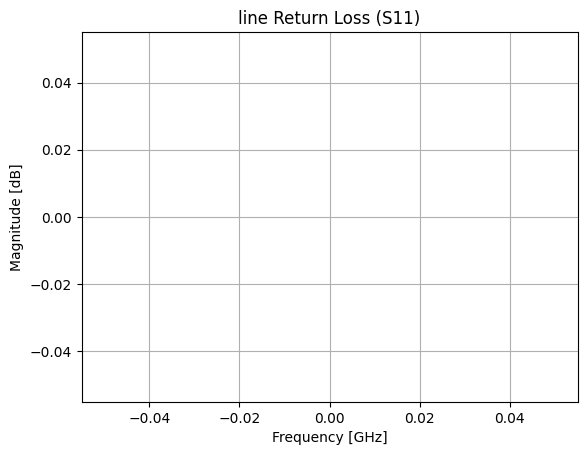

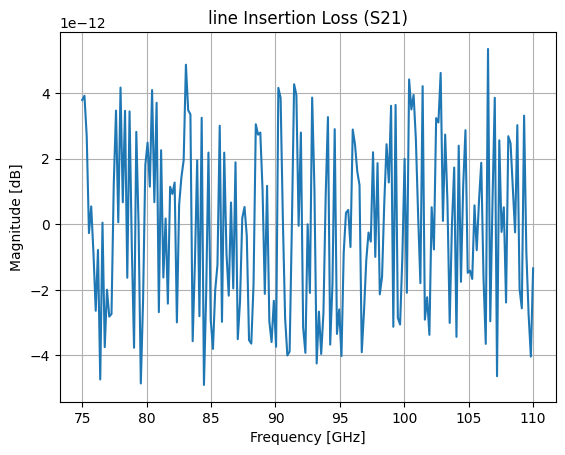

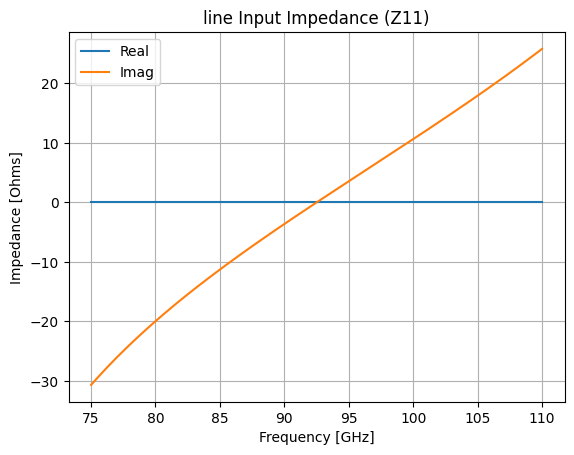

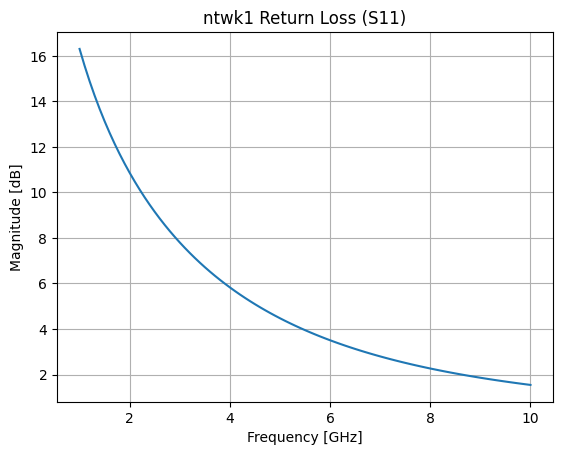

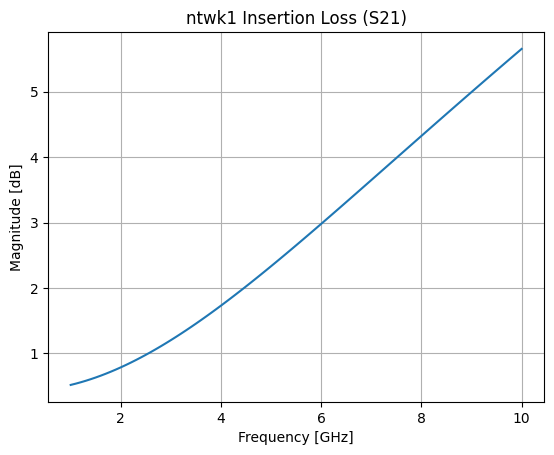

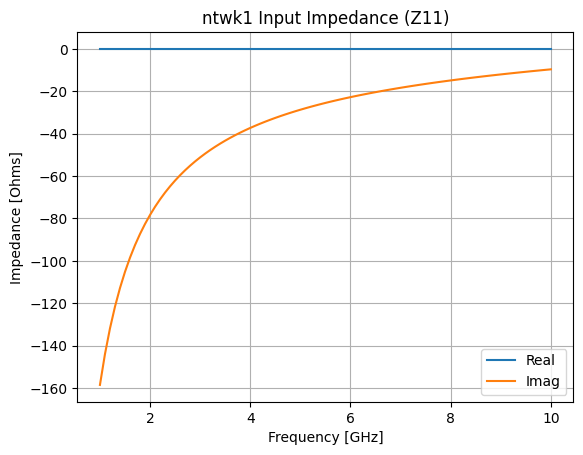

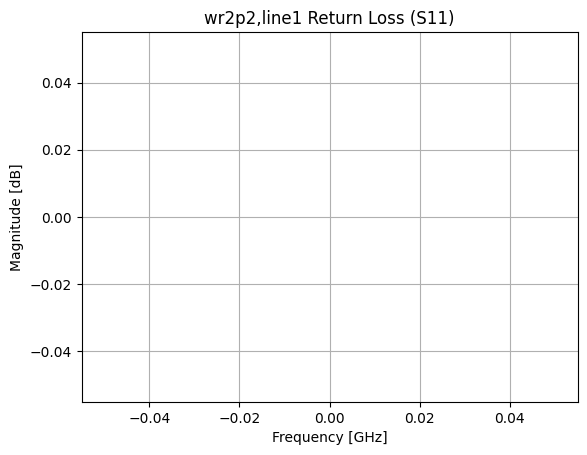

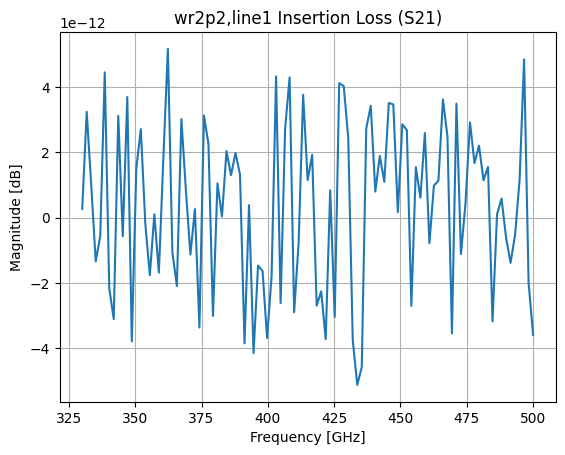

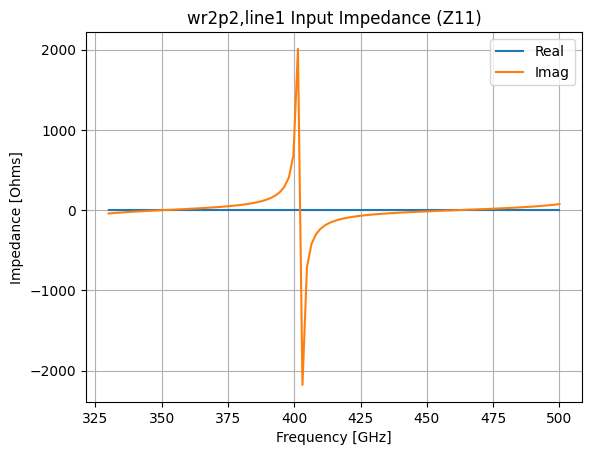

In [2]:

for touchstone_path in s2p_files:
    ntw = rf.Network(touchstone_path)
    freq = ntw.frequency.f/1e9
    return_loss_db = -20*np.log10(np.abs(ntw.s[:,0,0]))
    insertion_loss_db = -20*np.log10(np.abs(ntw.s[:,1,0]))
    impedance = ntw.z[:,0,0]
    stem = pathlib.Path(touchstone_path).stem

    plt.figure()
    plt.plot(freq, return_loss_db)
    plt.title(f'{stem} Return Loss (S11)')
    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid(True)
    plt.savefig(output_dir / f'{stem}_return_loss.png')
    plt.show()

    plt.figure()
    plt.plot(freq, insertion_loss_db)
    plt.title(f'{stem} Insertion Loss (S21)')
    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid(True)
    plt.savefig(output_dir / f'{stem}_insertion_loss.png')
    plt.show()

    plt.figure()
    plt.plot(freq, impedance.real, label='Real')
    plt.plot(freq, impedance.imag, label='Imag')
    plt.title(f'{stem} Input Impedance (Z11)')
    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Impedance [Ohms]')
    plt.legend()
    plt.grid(True)
    plt.savefig(output_dir / f'{stem}_impedance.png')
    plt.show()


In [3]:
import nbformat
from nbconvert import ScriptExporter

nb = nbformat.read('plot_sparameters.ipynb', as_version=4)
script, _ = ScriptExporter().from_notebook_node(nb)
with open('plot_sparameters.py', 'w') as f:
    f.write(script)
print('Exported notebook to plot_sparameters.py')

Exported notebook to plot_sparameters.py
